<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# فراخوانی مجموعه داده‌ی پوشش جنگلی
forest_covtype = datasets.fetch_covtype()

# داده‌های ویژگی و برچسب‌ها
X, y = forest_covtype.data, forest_covtype.target

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# در این مرحله، متغیرهای X_train و X_test حاوی ویژگی‌ها و y_train و y_test حاوی برچسب‌ها برای
# تربیت و آزمایش مدل شما هستند.

In [8]:
print(X.shape)
y.shape

(581012, 54)


(581012,)

In [14]:
# 3. آموزش دهی مدل
# ایجاد یک مثال از کلاس LogisticRegression
log_reg = LogisticRegression(max_iter=100)  # ممکن است برای همگرایی به افزایش max_iter نیاز باشد
log_reg.fit(X_train, y_train)

# 4. پیش‌بینی داده‌های تست
y_pred = log_reg.predict(X_test)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# 5. محاسبه معیارها
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. نمایش نتایج
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6214716816596292
Precision: 0.287172093249476
Recall: 0.23030016697699013
F1 Score: 0.23311593126314503
Confusion Matrix:
[[40564 22735    60     0     0     2   195]
 [18886 65647   430     0     0    28    87]
 [  185  8129  2075     0     0   248     1]
 [    0   567   228     0     0     0     0]
 [  302  2607    28     0     0     0     4]
 [  268  4496   434     0     0    29     0]
 [ 5365   694     0     0     0     0    10]]


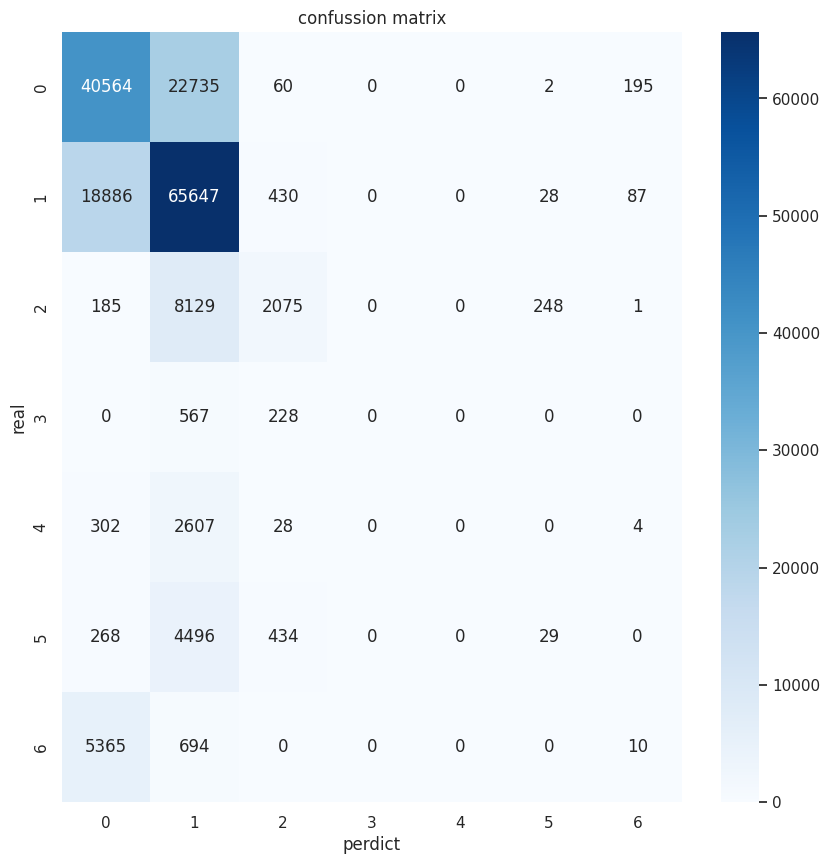

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# فرض می‌کنیم که متغیر conf_matrix از قبل تولید شده است
# گرافیکی نمایش دادن ماتریس کانفیوژن
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('real')
plt.xlabel('perdict')
plt.title('confussion matrix')
plt.show()

In [20]:
import numpy as np
from sklearn.datasets import fetch_covtype

# فراخوانی مجموعه داده‌ی پوشش جنگلی
data = fetch_covtype()
y = data.target

# شمارش تعداد نمونه‌ها در هر کلاس
classes, counts = np.unique(y, return_counts=True)

# نمایش تعداد داده‌ها از هر کلاس
for cls, count in zip(classes, counts):
    print(f"Class {cls}: {count} instances")

Class 1: 211840 instances
Class 2: 283301 instances
Class 3: 35754 instances
Class 4: 2747 instances
Class 5: 9493 instances
Class 6: 17367 instances
Class 7: 20510 instances


In [1]:
from sklearn.datasets import fetch_covtype
from collections import Counter

# فراخوانی مجموعه داده‌ها
data = fetch_covtype()
y = data.target

# شمارش تعداد نمونه‌ها در هر کلاس
class_counts = Counter(y)

# نمایش تعداد داده‌ها از هر کلاس
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} instances")

# اگر تصمیم به متعادل‌سازی دارید، می‌توانید ادامه دهید با:


Class 5: 9493 instances
Class 2: 283301 instances
Class 1: 211840 instances
Class 7: 20510 instances
Class 3: 35754 instances
Class 6: 17367 instances
Class 4: 2747 instances


In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# داده‌های ویژگی
X = data.data

# Over-sampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# اکنون X_resampled و y_resampled متعادل شده است.

# برای Under-sampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

# باز هم، X_resampled و y_resampled متعادل شده است.

In [4]:
X=X_resampled
y= y_resampled


In [5]:
# شمارش تعداد نمونه‌ها در هر کلاس
class_counts = Counter(y)

# نمایش تعداد داده‌ها از هر کلاس
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} instances")


Class 1: 2747 instances
Class 2: 2747 instances
Class 3: 2747 instances
Class 4: 2747 instances
Class 5: 2747 instances
Class 6: 2747 instances
Class 7: 2747 instances


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# در این مرحله، متغیرهای X_train و X_test حاوی ویژگی‌ها و y_train و y_test حاوی برچسب‌ها برای
# تربیت و آزمایش مدل شما هستند.

# 3. آموزش دهی مدل
# ایجاد یک مثال از کلاس LogisticRegression
log_reg = LogisticRegression(max_iter=100)  # ممکن است برای همگرایی به افزایش max_iter نیاز باشد
log_reg.fit(X_train, y_train)

# 4. پیش‌بینی داده‌های تست
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# 5. محاسبه معیارها
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. نمایش نتایج
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.48049921996879874
Precision: 0.46771379822059533
Recall: 0.4833122528570866
F1 Score: 0.472778034985656
Confusion Matrix:
[[354 115   4   0  79  29 214]
 [174 293  37   1 136  91  88]
 [  8  51 279 220  91 193  11]
 [  0   2  57 684  23  51   1]
 [ 54 158  73   3 374 130  39]
 [ 29  81 237 116 126 252  14]
 [221  32   0   0   8   0 536]]


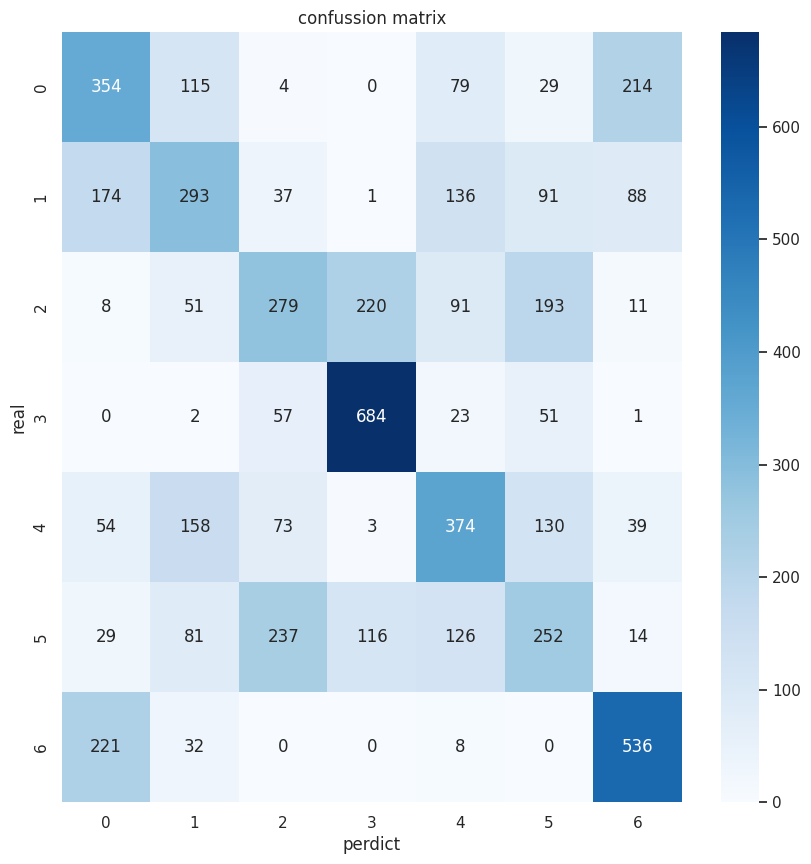

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# فرض می‌کنیم که متغیر conf_matrix از قبل تولید شده است
# گرافیکی نمایش دادن ماتریس کانفیوژن
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('real')
plt.xlabel('perdict')
plt.title('confussion matrix')
plt.show()

استاندارد کردن داده ها

In [15]:
from sklearn.preprocessing import StandardScaler

# تعریف scaler
scaler = StandardScaler()

# فیت scaler با استفاده از داده‌های آموزش
X_train = scaler.fit_transform(X_train)

# X_resampled_scaled حالا داده‌های متعادل شده و استاندارد شده است
X_test  = scaler.fit_transform(X_test)



In [16]:
log_reg = LogisticRegression(max_iter=100)  # ممکن است برای همگرایی به افزایش max_iter نیاز باشد
log_reg.fit(X_train, y_train)

# 4. پیش‌بینی داده‌های تست
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# 5. محاسبه معیارها
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. نمایش نتایج
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7080949904662853
Precision: 0.7052379784040409
Recall: 0.7100644658504279
F1 Score: 0.7061241901213327
Confusion Matrix:
[[563 120   0   0  30   6  76]
 [201 417  15   0 143  32  12]
 [  0   5 486 106  38 218   0]
 [  0   0  46 729   0  43   0]
 [  7 145  20   0 616  43   0]
 [  0  12 171  79  41 552   0]
 [ 75   0   0   0   0   0 722]]


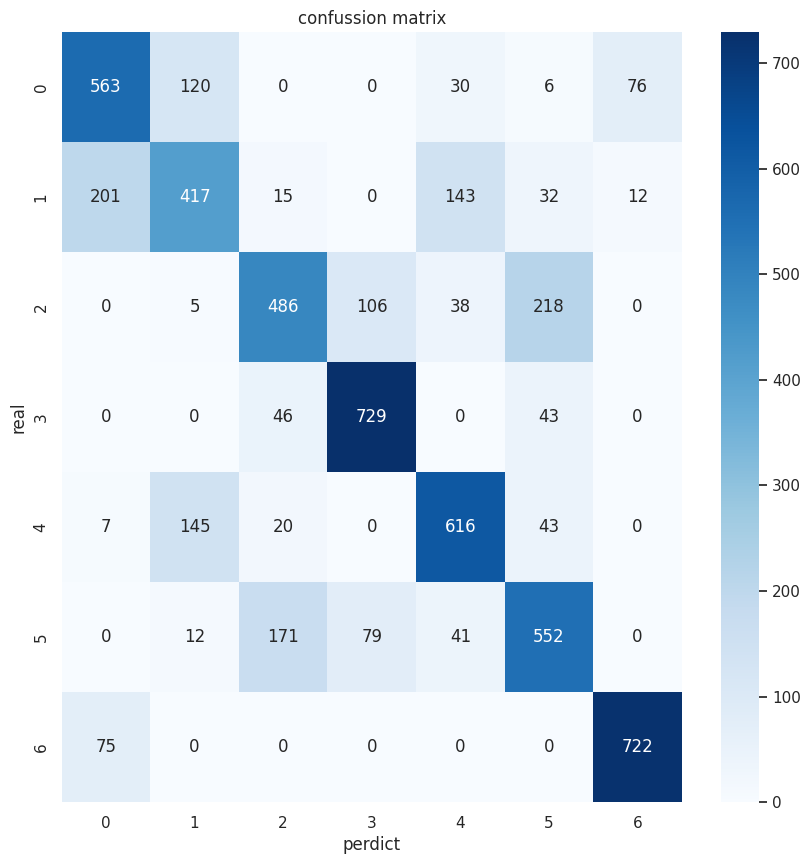

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# فرض می‌کنیم که متغیر conf_matrix از قبل تولید شده است
# گرافیکی نمایش دادن ماتریس کانفیوژن
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('real')
plt.xlabel('perdict')
plt.title('confussion matrix')
plt.show()